In [17]:
## imports
import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import eofs
from eofs.xarray import Eof
import cftime
import nc_time_axis
import cmocean as cmo
import mtspec

# from pylab import *

import datetime
import time
import glob, os
import math
import matplotlib.colors as colors

In [18]:
#Exclude HadGEM3 from model list to calculate MMM 
folder = ''
modellist =  ['GISS2.1G', 'EC-Earth3-LR', 'CCSM4-UoT', 'CCSM4-Utr','CCSM4', 'CESM1.2', 'CESM2', 'IPSL-CM5A', 'IPSL-CM5A2','IPSL-CM6A','MIROC4m','COSMOS', 'HadCM3', 'NorESM1-F']#,'HadGEM3']

In [3]:
lats = np.arange(-89, 90) #All OHT interpolated to 1deg latitude increments

dsE280 = xr.Dataset(data_vars = dict(Ftot=(["model", "lats"], np.zeros([len(modellist),len(lats)])), Fov=(["model", "lats"], np.zeros([len(modellist),len(lats)])), Faz=(["model", "lats"], np.zeros([len(modellist),len(lats)]))), coords = dict(model = modellist, lats = lats))
dsEoi400 = dsE280.copy(deep=True)

for i in range(len(modellist)):
    model = modellist[i]
    ds1 = xr.open_dataset(folder+model+'/E280/decomFW_100yr.nc')
    dsE280.Fov[i,:]= ds1.Fov.interp(lat=lats, method='linear')
    dsE280.Faz[i,:]= ds1.Faz.interp(lat=lats, method='linear')
    dsE280.Ftot[i,:]= ds1.Ftot.interp(lat=lats, method='linear')
    
    ds2 = xr.open_dataset(folder+model+'/Eoi400/decomfW_100yr.nc')
    dsEoi400.Fov[i,:]= ds2.Fov.interp(lat=lats, method='linear')
    dsEoi400.Faz[i,:]= ds2.Faz.interp(lat=lats, method='linear')
    dsEoi400.Ftot[i,:]= ds2.Ftot.interp(lat=lats, method='linear')
    
mmmE280_Fov = dsE280.Fov.mean(dim='model')
mmmEoi400_Fov = dsEoi400.Fov.mean(dim='model')
std_ov = (dsEoi400.Fov-dsE280.Fov).std(dim='model')

mmmE280_Faz = dsE280.Faz.mean(dim='model')
mmmEoi400_Faz = dsEoi400.Faz.mean(dim='model')
std_az = (dsEoi400.Faz-dsE280.Faz).std(dim='model')

mmmE280_Ftot = dsE280.Ftot.mean(dim='model')
mmmEoi400_Ftot = dsEoi400.Ftot.mean(dim='model')
std_tot = (dsEoi400.Ftot-dsE280.Ftot).std(dim='model')

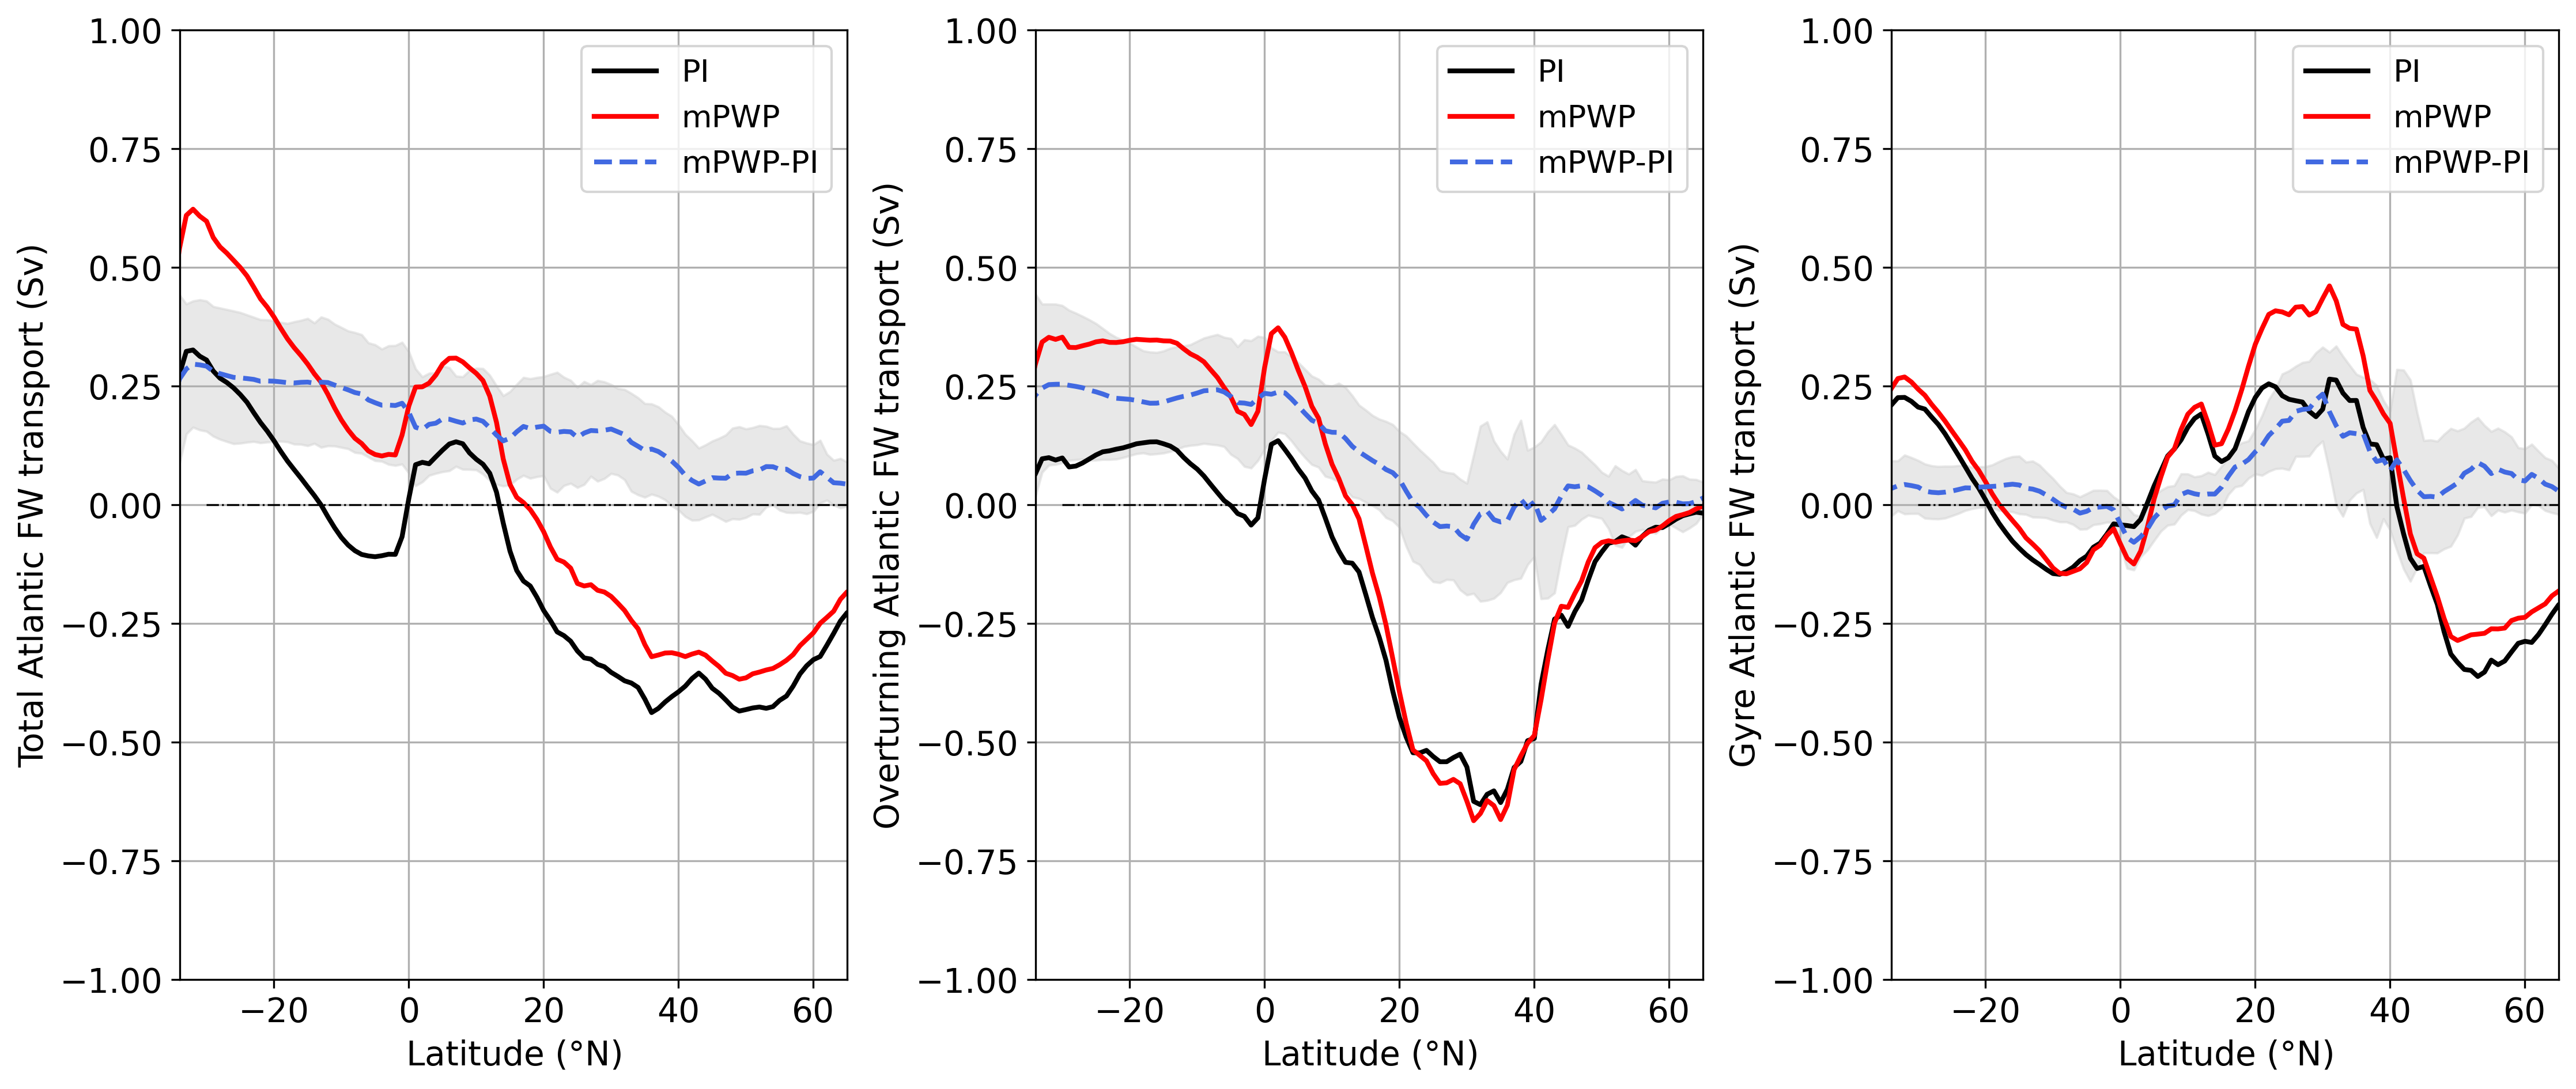

In [4]:
lats = np.arange(-89, 90)

fig1, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6.4), dpi=300)

ax[1].plot(lats, mmmE280_Fov, color='black',linewidth = 2, label='PI')
ax[1].plot(lats, mmmEoi400_Fov, color='red',linewidth = 2, label='mPWP')
ax[1].plot(lats, mmmEoi400_Fov-mmmE280_Fov, color='royalblue', linewidth =2, linestyle='--', label='mPWP-PI')
ax[1].fill_between(lats, (mmmEoi400_Fov-mmmE280_Fov)-std_ov, (mmmEoi400_Fov-mmmE280_Fov)+std_ov, color='lightgrey', alpha=0.5)

ax[2].plot(lats, mmmE280_Faz, color='black',linewidth = 2, label='PI')
ax[2].plot(lats, mmmEoi400_Faz, color='red',linewidth = 2, label='mPWP')
ax[2].plot(lats, mmmEoi400_Faz-mmmE280_Faz, color='royalblue', linewidth =2, linestyle='--', label='mPWP-PI')
ax[2].fill_between(lats, (mmmEoi400_Faz-mmmE280_Faz)-std_az, (mmmEoi400_Faz-mmmE280_Faz)+std_az, color='lightgrey', alpha=0.5)

ax[0].plot(lats, mmmE280_Ftot, color='black',linewidth = 2, label='PI')
ax[0].plot(lats, mmmEoi400_Ftot, color='red',linewidth = 2, label='mPWP')
ax[0].plot(lats, mmmEoi400_Ftot-mmmE280_Ftot, color='royalblue', linewidth =2, linestyle='--',label='mPWP-PI')
ax[0].fill_between(lats, (mmmEoi400_Ftot-mmmE280_Ftot)-std_tot, (mmmEoi400_Ftot-mmmE280_Ftot)+std_tot, color='lightgrey', alpha=0.5)

for j in range(3):
    ax[j].legend(fontsize=13)
    ax[j].plot([-30, 80],[0,0], color='black',linewidth=0.8, linestyle='-.')
    ax[j].set_xlim([-34, 65])
    ax[j].set_ylim([-1, 1])
    ax[j].set_xlabel('Latitude ($\degree$N)', fontsize=14)
    ax[j].grid(True)
    plt.setp(ax[j].get_xticklabels(), fontsize=14)
    plt.setp(ax[j].get_yticklabels(), fontsize=14)
    
ax[1].set_ylabel('Overturning Atlantic FW transport (Sv)', fontsize=14)
ax[2].set_ylabel('Gyre Atlantic FW transport (Sv)', fontsize=14)
ax[0].set_ylabel('Total Atlantic FW transport (Sv)', fontsize=14)
fig1.tight_layout()
plt.savefig('fig06.png', bbox_inches='tight')

In [5]:
#Decrease in freshwater at 65 deg N:
print((mmmEoi400_Ftot-mmmE280_Ftot)[-25])
print((mmmEoi400_Ftot-mmmE280_Ftot)[-25]/mmmE280_Ftot[-25]*100)

<xarray.DataArray 'Ftot' ()>
array(0.04373987)
Coordinates:
    lats     int64 65
<xarray.DataArray 'Ftot' ()>
array(-19.28077897)
Coordinates:
    lats     int64 65


In [6]:
#Decrease in freshwater at 34 deg S:
print((mmmEoi400_Ftot-mmmE280_Ftot)[-124])
print((mmmEoi400_Ftot-mmmE280_Ftot)[-124]/mmmE280_Ftot[-124]*100)

<xarray.DataArray 'Ftot' ()>
array(0.26547207)
Coordinates:
    lats     int64 -34
<xarray.DataArray 'Ftot' ()>
array(96.28980177)
Coordinates:
    lats     int64 -34


In [19]:
#Include HadGEM3 here
folder = '/Users/6497241/surfdrive/Documents/PlioMIP2-OHT/Data/Processed/'
modellist =  ['GISS2.1G', 'EC-Earth3-LR', 'CCSM4-UoT', 'CCSM4-Utr','CCSM4', 'CESM1.2', 'CESM2', 'IPSL-CM5A', 'IPSL-CM5A2','IPSL-CM6A','MIROC4m','COSMOS', 'HadCM3', 'NorESM1-F','HadGEM3']

In [20]:
fwlab = np.zeros([3,len(modellist)])
fwfram = np.zeros([3,len(modellist)])
fwbs = np.zeros([len(modellist)])

#Compute transports at 62Nfor Labrador Sea and Fram Strait/GSR
#Bering Strait transport is generally computed at 65N, but for three models at different latitude due to land-sea mask 
for i in range(len(modellist)):
    model = modellist[i]
    strait = 'Lab'
    ds = xr.open_dataset(folder+model+'/E280/decomFW_'+strait+'_100yr.nc')
    fwlab[0,i]=ds.Ftot.sel(lat=62, method='nearest').values
    ds = xr.open_dataset(folder+model+'/Eoi400/decomFW_'+strait+'_100yr.nc')
    fwlab[1,i]=ds.Ftot.sel(lat=62, method='nearest').values
    
    strait = 'Fram'
    ds = xr.open_dataset(folder+model+'/E280/decomFW_'+strait+'_100yr.nc')
    fwfram[0,i]=ds.Ftot.sel(lat=62, method='nearest').values
    ds = xr.open_dataset(folder+model+'/Eoi400/decomFW_'+strait+'_100yr.nc')
    fwfram[1,i]=ds.Ftot.sel(lat=62, method='nearest').values
    
    strait = 'BS'
    ds = xr.open_dataset(folder+model+'/E280/decomFW_'+strait+'_100yr.nc')
    if model == 'IPSL-CM5A2':
        fwbs[i]=ds.Ftot.sel(lat=64.5, method='nearest').values
    elif model == 'IPSL-CM6A':
        fwbs[i]=ds.Ftot.sel(lat=62.5, method='nearest').values
    elif model == 'COSMOS':
        fwbs[i]=ds.Ftot.sel(lat=70, method='nearest').values
    else:
        fwbs[i]=ds.Ftot.sel(lat=65, method='nearest').values

#Difference between mPWP and PI
fwlab[2,:]=fwlab[1,:]-fwlab[0,:]
fwfram[2,:]=fwfram[1,:]-fwfram[0,:]

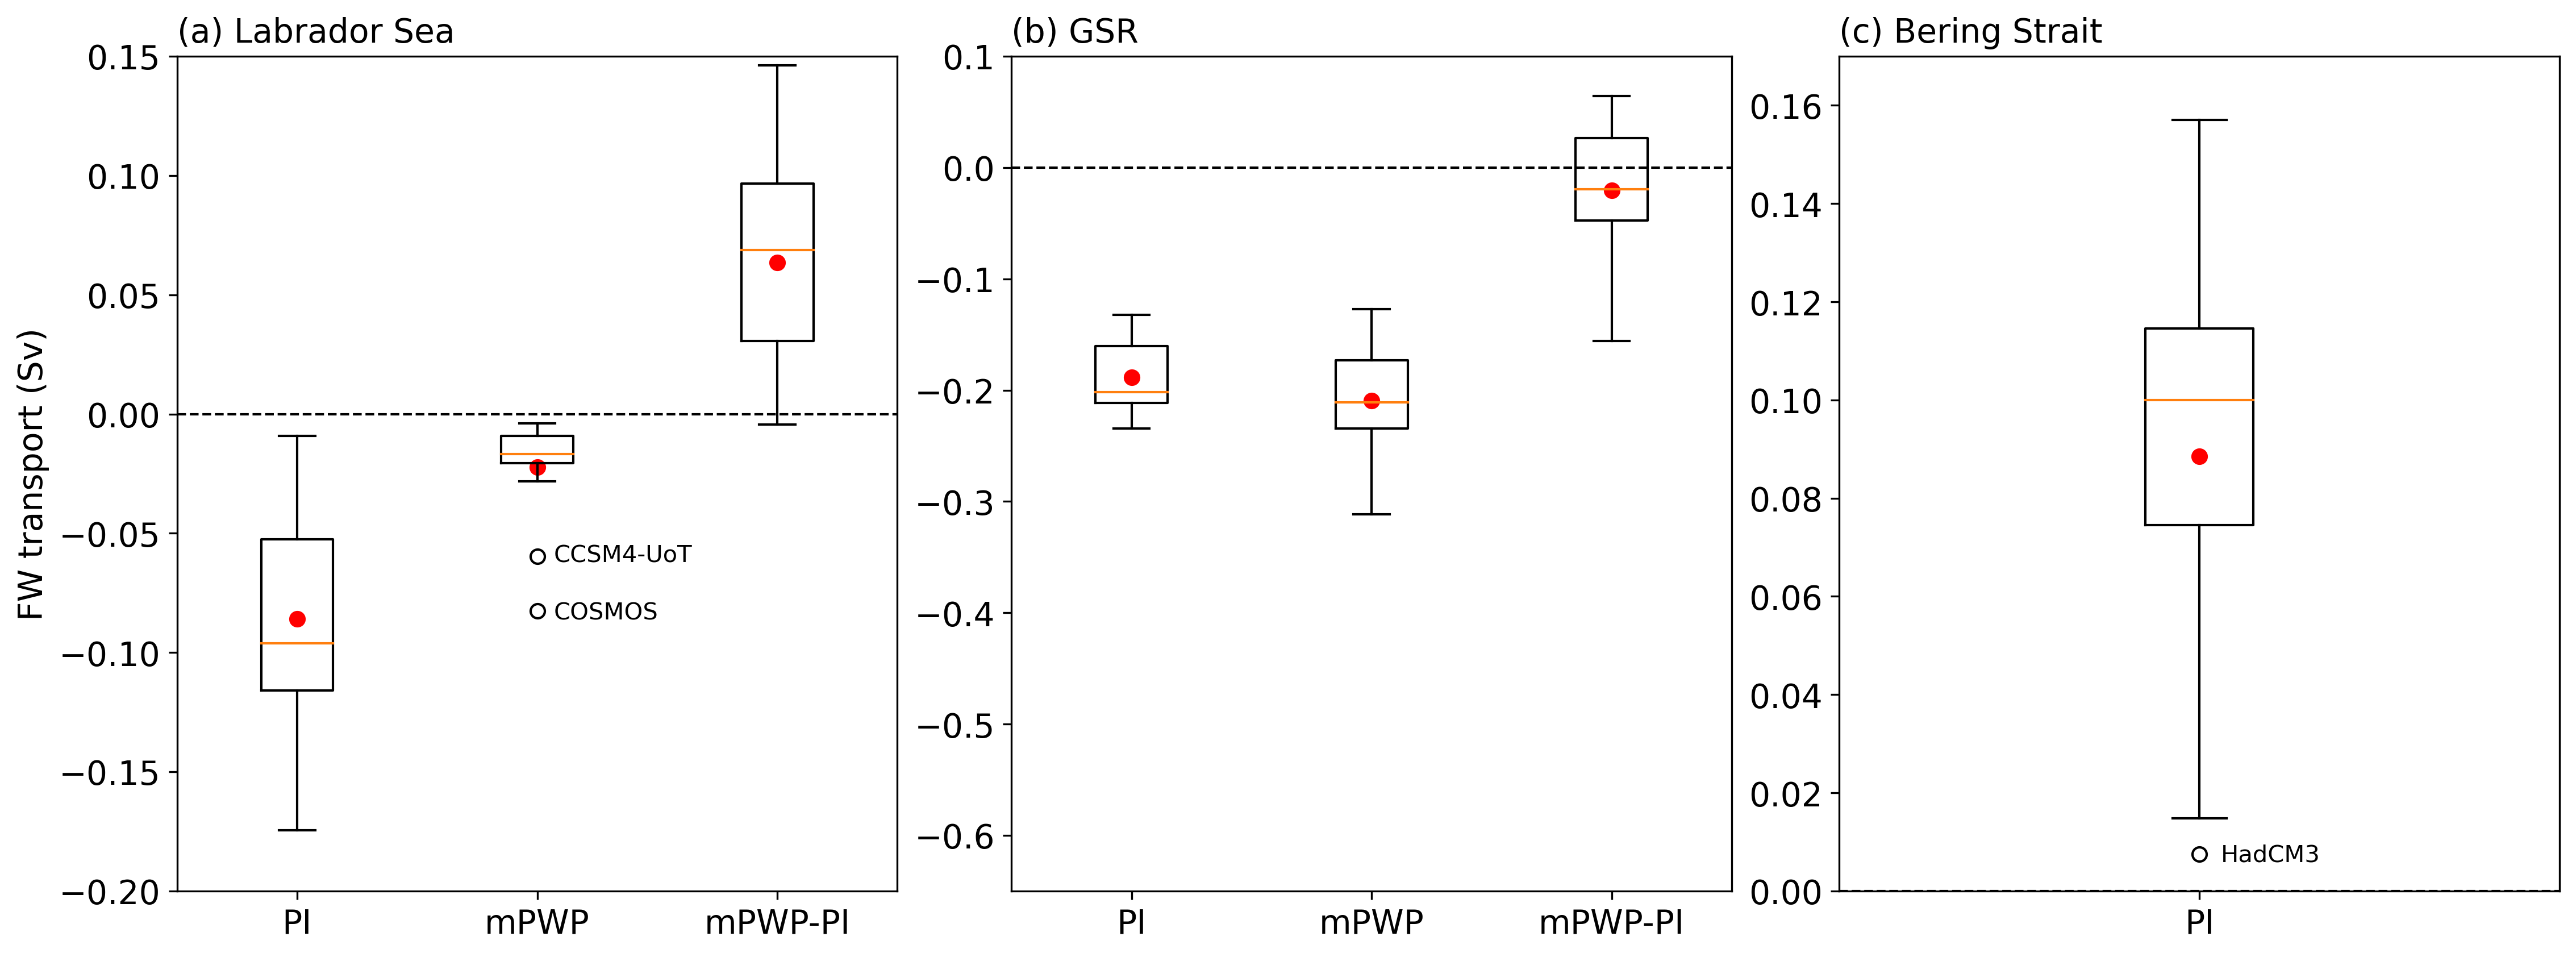

In [21]:
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['axes.labelsize'] = 14

fig1, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5.5), dpi=300, constrained_layout=True, )

ax[0].boxplot(np.transpose(fwlab[:,:-1]))
ax[0].set_title('(a) Labrador Sea', loc='left', fontsize=14)
ax[0].set_ylim([-0.20, 0.15])
ax[0].plot([0.5, 3.5], [0,0], color='black',linestyle='--', linewidth=1)
ax[0].scatter([1,2,3],[np.mean(fwlab[0,:-1]), np.mean(fwlab[1,:-1]), np.mean(fwlab[2,:-1])], color='red')
ax[0].set_xticks([1,2,3])
ax[0].set_xticklabels(['PI','mPWP','mPWP-PI'], rotation='horizontal')
ax[0].text(2.07,-0.062,'CCSM4-UoT', fontsize=10)
ax[0].text(2.07,-0.086,'COSMOS', fontsize=10)
ax[0].set_ylabel('FW transport (Sv)')

ax[1].boxplot(np.transpose(fwfram[:,:-1]))
ax[1].set_title('(b) GSR', loc='left', fontsize=14)
ax[1].set_ylim([-0.65, 0.1])
ax[1].plot([0.5, 3.5], [0,0], color='black',linestyle='--', linewidth=1)
ax[1].scatter([1,2,3],[np.mean(fwfram[0,:-1]), np.mean(fwfram[1,:-1]), np.mean(fwfram[2,:-1])], color='red')
ax[1].set_xticks([1,2,3])
ax[1].set_xticklabels(['PI','mPWP','mPWP-PI'], rotation='horizontal')

ax[2].boxplot(fwbs[:-1])
ax[2].set_title('(c) Bering Strait', loc='left', fontsize=14)
ax[2].set_ylim([0, 0.17])
ax[2].plot([0.5, 1.5], [0,0], color='black',linestyle='--', linewidth=1)
ax[2].scatter([1],[np.mean(fwbs[:-1])], color='red')
ax[2].set_xticks([1])
ax[2].set_xticklabels(['PI'], rotation='horizontal')
ax[2].text(1.03,0.006,'HadCM3', fontsize=10)
plt.savefig('fig07.png', bbox_inches='tight')

In [11]:
#Change in FW transport into Labrador Sea
print(np.mean(fwlab[2,:-1]))
print(np.mean(fwlab[2,:-1])/np.mean(fwlab[0,:-1])*100)

0.06347932653154159
-73.93791277834163


In [12]:
#Change in FW transport across GSR
print(np.mean(fwfram[2,:-1]))
print(np.mean(fwfram[2,:-1])/np.mean(fwfram[0,:-1])*100)

-0.020540652076947913
10.883127536610575


In [13]:
#PI FW transport across Bering Strait
print(np.mean(fwbs[:-1]))

0.0885568544267422


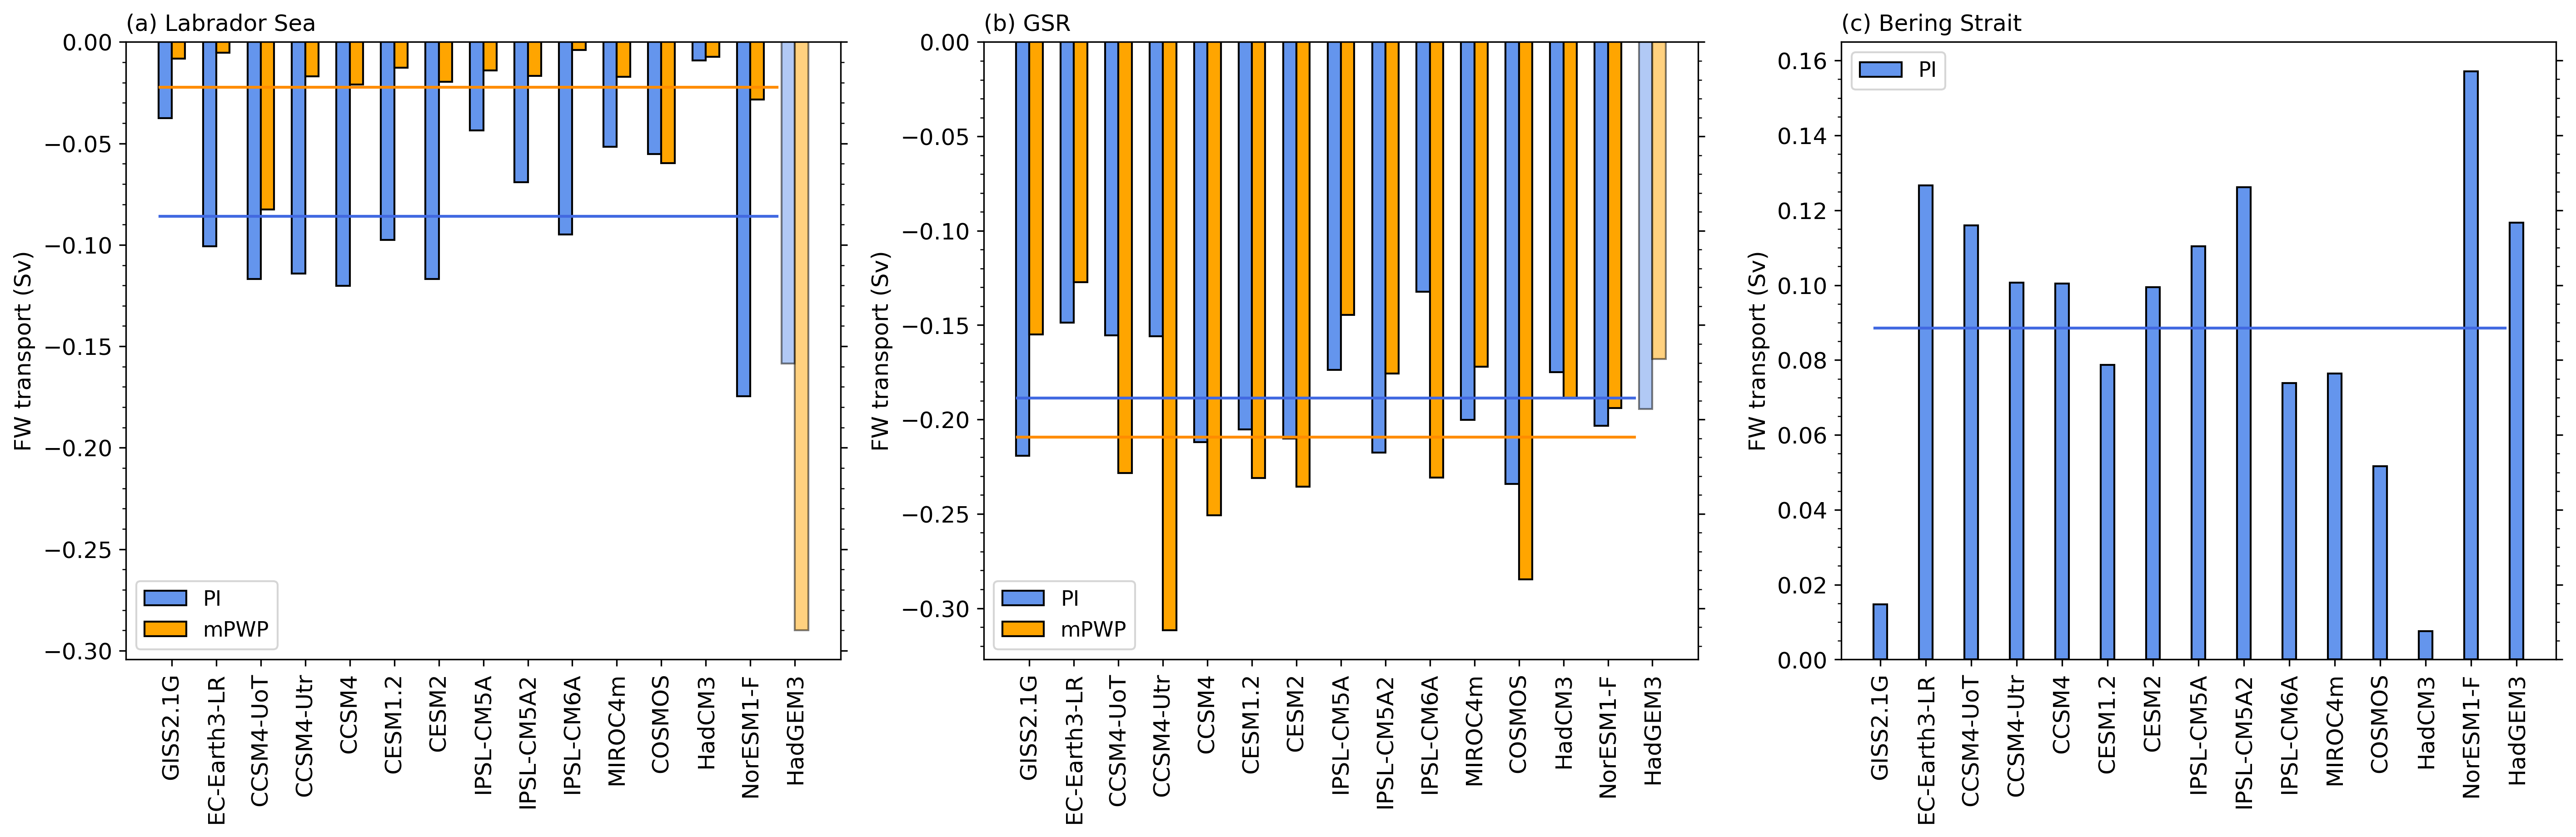

In [16]:
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize'] = 12

fig, ax = plt.subplots(1, 3, figsize=(23,6), dpi=300)

barWidth = 0.3
PI = fwlab[0,:]
Plio = fwlab[1,:]

# The x position of bars
r1 = np.arange(len(PI))
r2 = [x + barWidth for x in r1]

ax[0].plot([-0.12, len(PI)-1.25], [np.mean(PI[:-1]),np.mean(PI[:-1])], color='royalblue')
ax[0].plot([-0.12, len(Plio)-1.25], [np.mean(Plio[:-1]),np.mean(Plio[:-1])], color='darkorange')
ax[0].bar(r1[:-1], PI[:-1],  width = barWidth, color = 'cornflowerblue', edgecolor = 'black', capsize=7, label='PI')
ax[0].bar(r2[:-1], Plio[:-1], width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='mPWP')

ax[0].bar(r1[-1], PI[-1], width = barWidth, color = 'cornflowerblue', edgecolor = 'black', capsize=7, alpha=0.5)
ax[0].bar(r2[-1], Plio[-1], width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, alpha=0.5)

ax[0].set_xticks([r + 0.5*barWidth for r in range(len(PI))])
ax[0].set_xticklabels(modellist, rotation='vertical')
ax[0].set_ylabel('FW transport (Sv)')
ax[0].legend(fontsize=11)
ax[0].set_title('(a) Labrador Sea', loc='left')

PI = fwfram[0,:]
Plio = fwfram[1,:]

# The x position of bars
r1 = np.arange(len(PI))
r2 = [x + barWidth for x in r1]

ax[1].plot([-0.12, len(PI)-1.25], [np.mean(PI[:-1]),np.mean(PI[:-1])], color='royalblue')
ax[1].plot([-0.12, len(Plio)-1.25], [np.mean(Plio[:-1]),np.mean(Plio[:-1])], color='darkorange')

ax[1].bar(r1[:-1], PI[:-1], width = barWidth, color = 'cornflowerblue', edgecolor = 'black', capsize=7, label='PI')
ax[1].bar(r2[:-1], Plio[:-1], width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='mPWP')
ax[1].bar(r1[-1], PI[-1], width = barWidth, color = 'cornflowerblue', edgecolor = 'black', capsize=7, alpha=0.5)
ax[1].bar(r2[-1], Plio[-1], width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, alpha=0.5)

ax[1].set_xticks([r + 0.5*barWidth for r in range(len(PI))])
ax[1].set_xticklabels(modellist, rotation='vertical')
ax[1].set_ylabel('FW transport (Sv)')
ax[1].legend(fontsize=11)
ax[1].set_title('(b) GSR', loc='left')

PI = fwbs

# The x position of bars
r1 = np.arange(len(PI))
r2 = [x + barWidth for x in r1]

ax[2].plot([-0.12, len(PI)-1.25], [np.mean(PI[:-1]),np.mean(PI[:-1])], color='royalblue')
ax[2].bar(r1, PI,  width = barWidth, color = 'cornflowerblue', edgecolor = 'black', capsize=7, label='PI')

ax[2].set_xticks([r for r in range(len(PI))])
ax[2].set_xticklabels(modellist, rotation='vertical')
ax[2].set_ylabel('FW transport (Sv)')
ax[2].legend(fontsize=11)
ax[2].set_title('(c) Bering Strait', loc='left')

for i in range(3):
    ax[i].yaxis.get_ticklocs(minor=True)
    ax[i].minorticks_on()
    ax[i].yaxis.set_ticks_position('both')
    ax[i].xaxis.set_tick_params(which='minor', bottom=False)

plt.savefig('figs03.png', bbox_inches='tight')